In [ ]:
# Binary classification (Breast Cancer Wisconsin)
# https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
# import module
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print(tf.__version__)

2.12.0


In [ ]:
# load dataset
df = pd.read_csv('/content/drive/MyDrive/BIN-CLASS/cancer-diagnostic.csv')

In [ ]:
# return the first n rows
df.head(n=5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Check nulls value
df.isnull().sum()

In [ ]:
# check the Distribution Target in Dataset
diagnosis_values = df['diagnosis'].value_counts()
print('categories of (diagnosis) --- \n', diagnosis_values)
print('**'*40)

categories of (diagnosis) --- 
 B    357
M    212
Name: diagnosis, dtype: int64
********************************************************************************


In [ ]:
# create output variable
df = df.drop(['Unnamed: 32','id'], axis=1)
df = df.dropna()
df = df.replace({'B':0,'M':1})                 

In [ ]:
# return the first n rows
df.head(n=5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# exclude output in data normalization
excl = df.loc[:, df.columns != 'diagnosis'].astype('float32')

In [ ]:
# Minmax scaler
scaler = MinMaxScaler()
# transform data
excl = scaler.fit_transform(excl)

In [ ]:
# split into input (X, Y) variables
dataset = excl
X = dataset
Y = df['diagnosis'].astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0, shuffle=True)

In [ ]:
# create model
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(30,)),
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dropout(0.1),
	keras.layers.Dense(16, activation='relu'),
  keras.layers.Dropout(0.1),
  keras.layers.Dense(1, activation='sigmoid'),
])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 16)                496       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 785
Trainable params: 785
Non-trainable pa

In [ ]:
# compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# start training
history = model.fit(X_train, y_train, 
                    epochs=1000, 
                    batch_size=100)

test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

Epoch 1/1000
6/6 [==============================] - 2s 4ms/step - loss: 0.6971 - accuracy: 0.6172
Epoch 2/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.6211
Epoch 3/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.6735 - accuracy: 0.6523
Epoch 4/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.6697 - accuracy: 0.6387
Epoch 5/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.6612 - accuracy: 0.6699
Epoch 6/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.6558 - accuracy: 0.6660
Epoch 7/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.6473 - accuracy: 0.6836
Epoch 8/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.6358 - accuracy: 0.7012
Epoch 9/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.6234 - accuracy: 0.6855
Epoch 10/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.6191 - accuracy: 0.7031
Epoch 11/1000
6/6 [

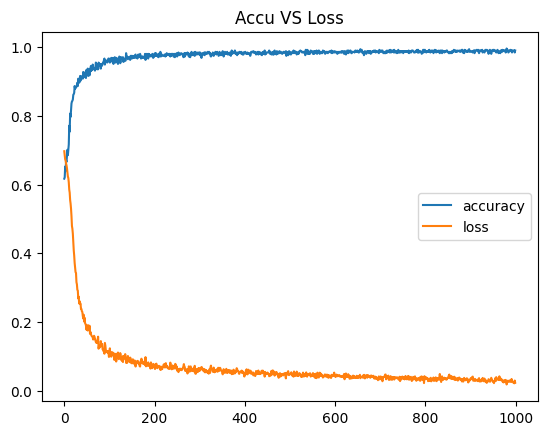

In [ ]:
pd.DataFrame(history.history)[['accuracy', 'loss']].plot()
plt.title("Accu VS Loss")
plt.show()

2/2 [==============================] - 0s 5ms/step


<Axes: >

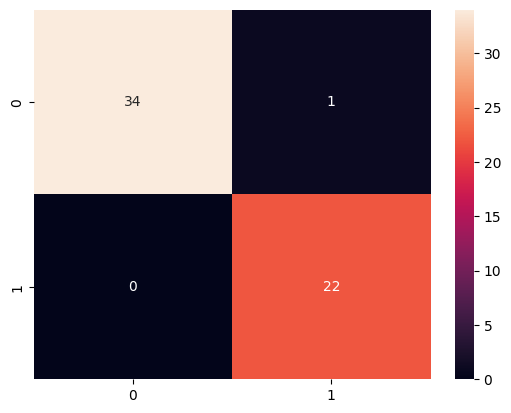

In [ ]:
# Predict on the test set and calculate confusion matrix
pred = model.predict(X_test)
pred = (pred > 0.5)
cm = confusion_matrix(y_test,pred)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True)

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('BIN_CLASS.h5')